

<h1><center><b>Time Series Analysis using Neural Networks</b></center></h1>


## Overview

This project aligns with the CRISP-DM methodology, starting with a clear understanding of the business context and data characteristics. The project aims to leverage advanced neural network techniques to derive actionable insights from the temperature dataset, serving real-world business and environmental needs.

## 1. Business Understanding

**Objective:** The primary goal of this project is to apply neural network models for forecasting daily minimum temperatures in Melbourne. This predictive analysis is crucial for sectors like agriculture, tourism, and energy, where temperature trends significantly impact decision-making and planning.

**Significance:** Accurate temperature forecasts can aid in better resource allocation, risk management, and strategy development for businesses and governmental organizations. In the context of climate change, understanding temperature patterns is also vital for environmental studies.

## 2. Data Understanding
Dataset Source: The dataset is sourced from Kaggle and titled "Daily Minimum Temperatures in Melbourne". View Dataset - https://www.kaggle.com/datasets/paulbrabban/daily-minimum-temperatures-in-melbourne

**Content:**

- The dataset includes daily recorded minimum temperatures in Melbourne.
- The time frame covers several years, providing a rich historical perspective of temperature variations.

**Key Attributes:**

- Date: Represents the specific day of the temperature recording.
- Temperature: The recorded minimum temperature in Melbourne for each day.

**Usage:**

- This dataset is used to train and test neural network models.
- It provides a practical example for time series analysis, where patterns over time are crucial.

**Challenges:**

- Handling missing or inconsistent data.
- Dealing with seasonal variations and identifying underlying trends.

In [ ]:
import pandas as pd
data = pd.read_csv("temp.csv", skipfooter=2)
data

/tmp/ipykernel_4668/2996718472.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("temp.csv", skipfooter=2)


,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990",Unnamed: 2
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,NaN
2,1981-01-03,18.8,NaN
3,1981-01-04,14.6,NaN
4,1981-01-05,15.8,NaN
...,...,...,...
3645,1990-12-27,14,NaN
3646,1990-12-28,13.6,NaN
3647,1990-12-29,13.5,NaN
3648,1990-12-30,15.7,NaN


## 3. Data Preparation

 Initial exploration **head() and tail() **to view the first and last few records of the dataset, giving an initial understanding of the data structure and format.

In [ ]:
!head temp.csv

Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990",
1981-01-01,20.7,
1981-01-02,17.9,
1981-01-03,18.8,
1981-01-04,14.6,
1981-01-05,15.8,
1981-01-06,15.8,
1981-01-07,15.8,
1981-01-08,17.4,
1981-01-09,21.8,


In [ ]:
!tail temp.csv

1990-12-24,10,
1990-12-25,12.9,
1990-12-26,14.6,
1990-12-27,14,
1990-12-28,13.6,
1990-12-29,13.5,
1990-12-30,15.7,
1990-12-31,13,
,,
Daily minimum temperatures in Melbourne, Australia, 1981-1990


### Data cleaning

**Droping the unnecessary column**
**Giving appropriate names for the necessary columns**

In [ ]:
data = data.drop(['Unnamed: 2'], axis=1)

In [ ]:
data.columns=['Date', 'Temp']


In [ ]:
data


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [ ]:
data.dtypes

Date    object
Temp    object
dtype: object

In [ ]:
data

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


Here, we can see the data which are not in **Numerical** datatype

In [ ]:
data.isnull().sum()

Date    0
Temp    0
dtype: int64

In [ ]:
data.isna().sum()

Date    0
Temp    0
dtype: int64

Changing the date column as the index column

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
data[562:570]

,Temp
Date,
1982-07-17,3.7
1982-07-18,3.9
1982-07-19,5.2
1982-07-20,?0.2
1982-07-21,?0.8
1982-07-22,0.9
1982-07-23,3.5
1982-07-24,6.6


1. Changing the index colunm type from Object to date type.
2. Whilst trying to change Temp column to numerical but there are some strings there within the temp.

In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Temp    3650 non-null   object
dtypes: object(1)
memory usage: 57.0+ KB


> Finding the special characters from the Temp column. Then removing it with a whitespace.

> After that we can able to change the type from object to numerical in order to build the model.

In [ ]:
non_numeric_rows = data['Temp'].apply(lambda x: x.isnumeric())

In [ ]:
data['Temp'] = data['Temp'].str.replace('?','')


/tmp/ipykernel_4668/409839310.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Temp'] = data['Temp'].str.replace('?','')


In [ ]:
data['Temp'] = pd.to_numeric(data['Temp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [ ]:
data[562:570]
data.shape

(3650, 1)

<h3>Here we can see the original data series information. </h3>

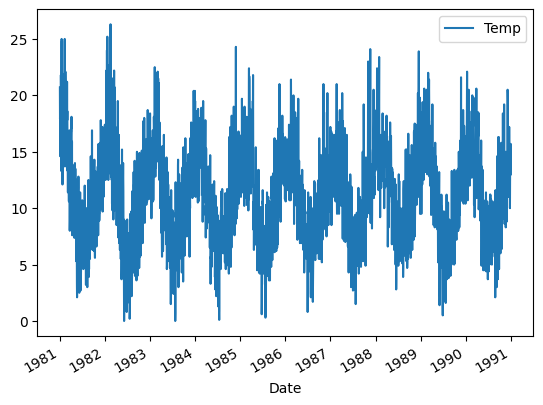

In [ ]:
import matplotlib.pyplot as plt
data.plot()
plt.show()

This code is used to break down and visually analyze the temperature time series data into its observed, trend, seasonal, and residual components. This analysis is crucial for understanding the underlying patterns and behaviors in time series data.

Figure(1000x1000)
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


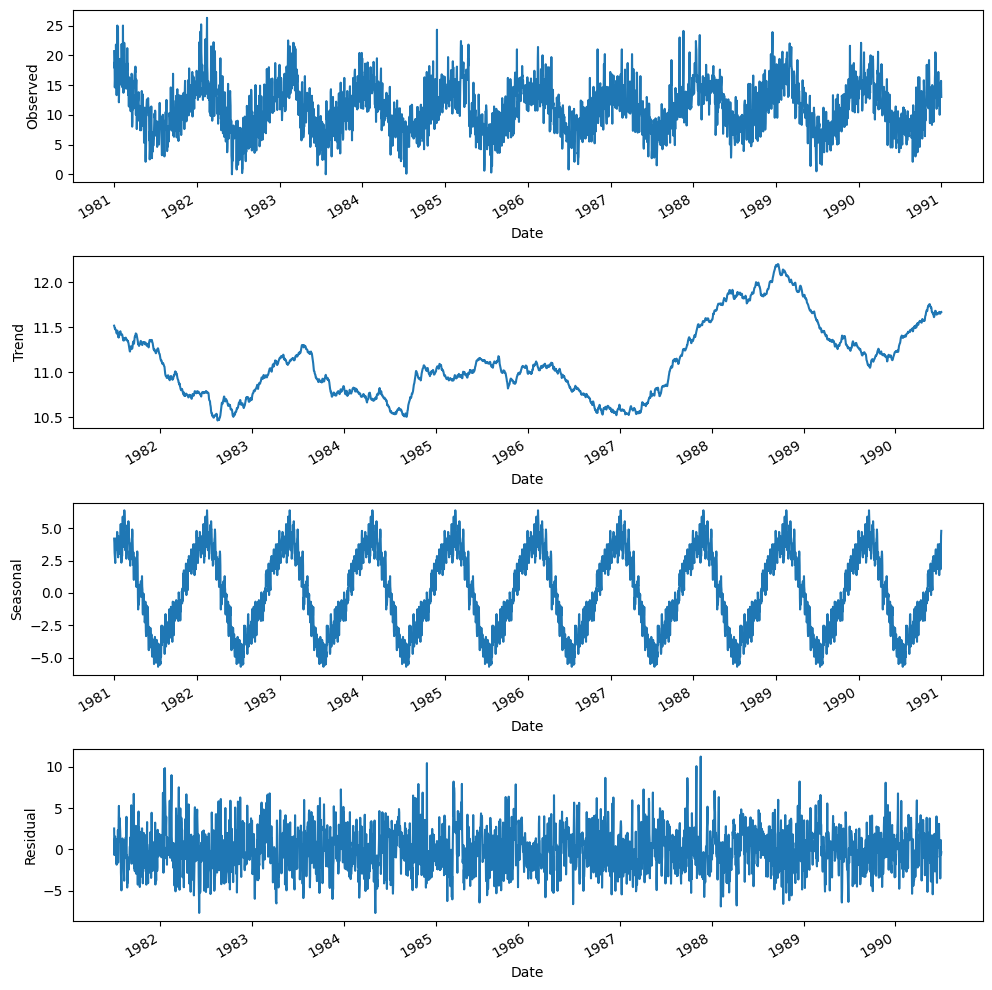

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the temperature series
result = seasonal_decompose(data, model='additive', period=365)
print(result)
# Plot the original, trend, seasonal, and residue
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10))

print(fig)
print(axes)

result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')

result.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')

result.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')

plt.tight_layout()

plt.show()

### Normalize the data



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scale = MinMaxScaler()
scale_data = scale.fit_transform(data)
scale_data.shape

(3650, 1)

In [ ]:
size = int(0.8*len(scale_data))
size

2920

### Generate train and test time series sequences
Importing TimeseriesGenerator:
The TimeseriesGenerator is a utility from TensorFlow's Keras API that generates batches of temporal data. It is particularly useful for creating sequences of data suitable for training time series models like RNNs.

In [ ]:
train_data = scale_data[:size]
test_data = scale_data[size:]

print(train_data.shape)
print(train_data[0])
test_data[0]

(2920, 1)
[0.78707224]


array([0.54372624])

- Here, seq_size (sequence size) is set to 5, meaning each input sequence will contain 5 data points. batch_size is set to 1, indicating that each batch generated will contain one sequence.

- These lines create training (train_gen) and testing (test_gen) generators. The TimeseriesGenerator takes in the input data (train_data and test_data) and also the target data (also train_data and test_data in this case). The reshape(-1) flattens the data, ensuring it's in the correct format. The length parameter is the size of the input sequences, and batch_size determines the number of sequences per batch.

- These lines print the number of batches in the training and testing generators. Accessing test_gen[0] would display the first batch in the test generator.

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
seq_size = 5
batch_size = 1
train_gen = TimeseriesGenerator(train_data.reshape(-1), train_data.reshape(-1), length = seq_size, batch_size = batch_size)
test_gen = TimeseriesGenerator(test_data.reshape(-1), test_data.reshape(-1), length = seq_size, batch_size = batch_size)

# test1_gen = np.array(test_gen[0])
print(len(train_gen))
print(len(test_gen))
test_gen[0]

2915
725


(array([[0.54372624, 0.66159696, 0.70342205, 0.63878327, 0.43726236]]),
 array([0.36121673]))

- This code converts the generators into NumPy arrays for the features (X) and labels (y). The flatten() function is used to convert the input sequences into 1D arrays, which is a common requirement for feeding data into neural network models.

- The shapes of the feature and label arrays for both training and testing sets are printed. This is a good practice to ensure that the data is in the correct format before feeding it into a model.

In [ ]:
import numpy as np
test_X = np.array([np.array(elem[0]).flatten() for elem in test_gen])
test_y = np.array([elem[1] for elem in test_gen])
train_X = np.array([np.array(elem[0]).flatten() for elem in train_gen])
train_y = np.array([elem[1] for elem in train_gen])

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(2915, 5)
(725, 5)
(2915, 1)
(725, 1)


## 4. Modelling

### 4.1 Building a sequential model with 2 dense layers and an output layer

> This model is a straightforward, fully connected neural network with two hidden layers, designed for a regression task in time series prediction.

>The use of dense layers with ReLU activation and the choice of loss function and optimizer are typical for such problems.

>The model summary provides a quick overview of the model's architecture and parameter count.

In [ ]:
model = Sequential([
    Dense(120, input_dim=train_X.shape[1], activation='relu'),
    Dense(30, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 120)               720       
                                                                 
 dense_27 (Dense)            (None, 30)                3630      
                                                                 
 dense_28 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,381
Trainable params: 4,381
Non-trainable params: 0
_________________________________________________________________


### The final stages of the time series analysis project using a neural network. It includes model training, prediction, and evaluation.

In [ ]:
model.fit(train_X, train_y, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
98/98 [==============================] - 1s 3ms/step - loss: 0.0239 - acc: 0.0010
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0094 - acc: 0.0010
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0092 - acc: 0.0010
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0092 - acc: 0.0010
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 0.0010
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 0.0010
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 0.0010
Epoch 8/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 0.0010
Epoch 9/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 0.0010
Epoch 10/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 0.0010


### Making Predictions

In [ ]:
y_pred = model.predict(test_X)
y_pred.shape

23/23 [==============================] - 0s 2ms/step


(725, 1)

In [ ]:
y_pred[0]

array([0.49050674], dtype=float32)

### Inverse Transformation of Predictions

- Since the data was likely scaled or normalized before training, inverse_transform is used to convert the predictions back to their original scale.

In [ ]:
inv_pred = scale.inverse_transform(y_pred)
inv_pred

array([[12.900328 ],
       [12.021903 ],
       [13.458186 ],
       [14.535925 ],
       [14.279849 ],
       [13.069336 ],
       [13.385435 ],
       [14.486006 ],
       [13.154228 ],
       [13.785278 ],
       [15.729341 ],
       [16.75464  ],
       [15.496447 ],
       [14.479423 ],
       [14.561489 ],
       [16.332651 ],
       [14.725365 ],
       [15.037144 ],
       [13.484355 ],
       [13.7505455],
       [14.969338 ],
       [15.285281 ],
       [15.4873905],
       [17.781052 ],
       [18.561817 ],
       [16.950312 ],
       [17.054253 ],
       [17.126055 ],
       [15.759436 ],
       [16.477371 ],
       [15.81073  ],
       [14.988979 ],
       [14.160338 ],
       [16.412748 ],
       [16.865635 ],
       [16.042368 ],
       [15.474794 ],
       [16.402367 ],
       [15.92441  ],
       [17.094341 ],
       [17.286322 ],
       [18.19276  ],
       [18.28383  ],
       [18.954124 ],
       [19.76     ],
       [16.934015 ],
       [16.411577 ],
       [16.88

In [ ]:
test2_data = data[size:]
test2_data.shape

(730, 1)

In [ ]:
test2_data[30:]

,Temp
Date,
1989-01-31,16.5
1989-02-01,16.1
1989-02-02,14.4
1989-02-03,16.3
1989-02-04,15.7
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


### Preparing Actual Test Data for Comparison

- Similar to the predictions, the actual test labels (test_y) are also inverse transformed to their original scale for a fair comparison.

In [ ]:
test_y_real_inv = scale.inverse_transform(test_y)
test_y_real_inv

array([[ 9.5],
       [12.2],
       [15.7],
       [16.3],
       [13.6],
       [12.6],
       [13.8],
       [12.1],
       [13.4],
       [17.3],
       [19.4],
       [16.6],
       [13.9],
       [13.1],
       [16. ],
       [14.5],
       [15. ],
       [12.6],
       [12.5],
       [15.2],
       [16.2],
       [16.5],
       [20.1],
       [20.6],
       [16.9],
       [16.5],
       [16.1],
       [14.4],
       [16.3],
       [15.7],
       [14.2],
       [13.2],
       [16.8],
       [18.5],
       [16.7],
       [15.3],
       [15.9],
       [15.2],
       [17.5],
       [18.3],
       [19.4],
       [19.4],
       [19.5],
       [20.5],
       [15.7],
       [15. ],
       [16.1],
       [14.3],
       [13. ],
       [16.2],
       [17.7],
       [13.2],
       [15.8],
       [18.5],
       [20.4],
       [22. ],
       [19.7],
       [19.6],
       [20.3],
       [18.3],
       [18.9],
       [20.3],
       [21.4],
       [18.3],
       [17.8],
       [17.7],
       [12

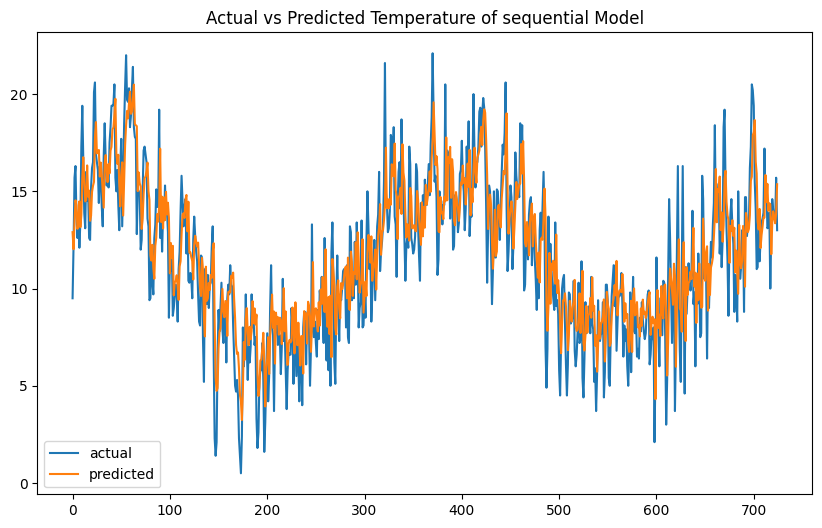

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.plot(test_y_real_inv, label='actual')
plt.plot(inv_pred, label='predicted')
plt.legend()
plt.title('Actual vs Predicted Temperature of sequential Model')
plt.savefig('JinoWiseson_AnbuAlaguraj_sequential_Model.png', dpi=300)
plt.show()
plt.close()

### Calculating R-Squared (R²) Score

- The R² score, a common metric for regression models, is calculated to quantify the model's performance.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test_y_real_inv, inv_pred)

0.6924463540380962

> An R² score of 0.6924463540380962 suggests that approximately 69.24% of the variance in the dependent variable (temperature) is predictable from the independent variables.

This part of the project demonstrates the training and evaluation of a neural network model for time series prediction. The process includes training the model, making predictions, inversely transforming these predictions, and evaluating the model's performance using R² score. The visual comparison of predicted vs actual values and the R² score together provide insights into the model's effectiveness in forecasting temperatures.

### 4.2 SimpleRNN

This RNN model is designed to capture the temporal dependencies in the time series data, which is crucial for forecasting tasks. The combination of a recurrent layer with dense layers allows the model to learn both the sequence patterns and their non-linear relationships.

In [ ]:
from tensorflow.keras.layers import SimpleRNN

modelRNN = Sequential([
    SimpleRNN(50, input_shape=(train_X.shape[1], 1)),
    Dense(30, activation='relu'),
    Dense(1)
])

In [ ]:
modelRNN.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
modelRNN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_29 (Dense)            (None, 30)                1530      
                                                                 
 dense_30 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________


### Training the Simple RNN model

Project involves training the RNN model on your prepared training data and then using the trained model to make predictions on the test data. The prediction results are stored in rnn_test_pred, which can be further used to evaluate the model's performance, such as comparing these predictions with the actual values and calculating performance metrics.

In [ ]:
history = modelRNN.fit(train_X, train_y, epochs=10, batch_size=32, verbose=0)

In [ ]:
rnn_test_pred = modelRNN.predict(test_X)
rnn_test_pred.shape

23/23 [==============================] - 0s 2ms/step


(725, 1)

In [ ]:
train_X.shape[1]

5

### Inverse Transforming the Predictions

In [ ]:
rnn_test_inv_pred = scale.inverse_transform(rnn_test_pred)
rnn_test_inv_pred

array([[12.157225 ],
       [11.181105 ],
       [12.705023 ],
       [14.0446415],
       [14.251636 ],
       [13.004771 ],
       [12.863822 ],
       [13.941188 ],
       [12.612013 ],
       [13.474735 ],
       [15.466676 ],
       [16.608133 ],
       [15.207226 ],
       [13.942288 ],
       [13.749309 ],
       [15.602337 ],
       [14.1134405],
       [14.766549 ],
       [12.755598 ],
       [13.134599 ],
       [14.555062 ],
       [14.797023 ],
       [15.26123  ],
       [17.920969 ],
       [18.121355 ],
       [16.17863  ],
       [16.264137 ],
       [16.105614 ],
       [14.893219 ],
       [16.003504 ],
       [15.240682 ],
       [14.306016 ],
       [13.466761 ],
       [15.941219 ],
       [16.365822 ],
       [15.536838 ],
       [14.933372 ],
       [15.739994 ],
       [15.2282295],
       [16.610954 ],
       [16.782795 ],
       [17.7628   ],
       [17.800224 ],
       [18.266966 ],
       [19.027525 ],
       [15.613888 ],
       [15.441907 ],
       [16.03

### Plotting Predicted vs Actual Temperatures

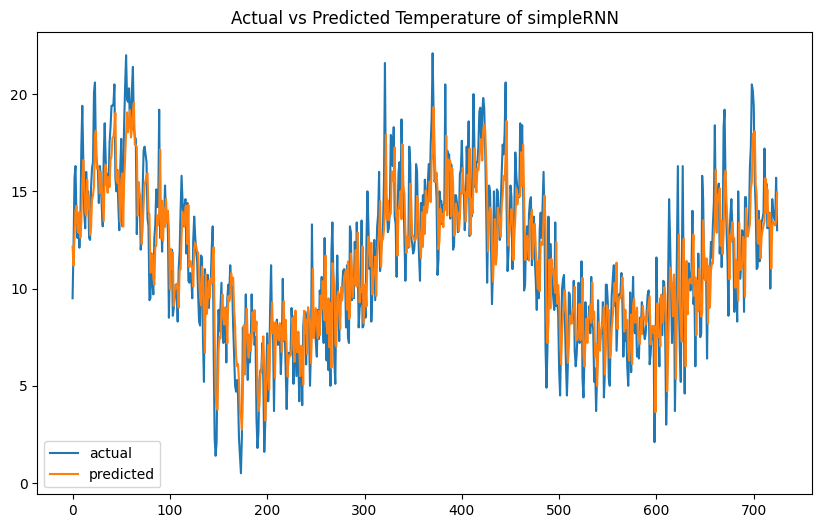

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.plot(test_y_real_inv, label='actual')
plt.plot(rnn_test_inv_pred, label='predicted')
plt.legend()
plt.title('Actual vs Predicted Temperature of simpleRNN')
plt.savefig('JinoWiseson_AnbuAlaguraj_SimpleRNN.png', dpi=300)
plt.show()
plt.close()

In [ ]:
r2_score(test_y_real_inv, rnn_test_inv_pred)

0.6984676978999267

> An R² score of 0.6984676978999267 suggests that approximately 69.85% of the variance in the dependent variable (temperature) is predictable from the independent variables by the SimpleRNN model.


This part of the project involves post-processing the predictions from your SimpleRNN model, visualizing these predictions against the actual values, and quantitatively evaluating the model's performance using the R² score. The visual comparison and the R² score together provide insights into how well the model has learned and predicted the temperature trends.

## 5. Evaluation

**Dense Neural Network (DNN):**

R² Score: 0.692 (approximately 69.2% of the variance in temperature is predictable).
Loss: Decreased over epochs, indicating learning from the training data. Exact loss values are not specified.

**Simple Recurrent Neural Network (SimpleRNN):**

R² Score: 0.698 (approximately 69.8% of the variance in temperature is predictable).
Loss: Specific loss values during training are not provided, but the R² score suggests a slightly better fit to the data compared to the DNN.

**Comparison Summary:**

***Performance:*** Both models perform similarly in terms of R² score, with the SimpleRNN model having a slight edge. This might be due to its ability to capture sequential dependencies in the data, which is important in time series forecasting.

***Complexity:*** The DNN is simpler but has slightly more parameters than the SimpleRNN. Despite its simplicity, it does not inherently account for the temporal sequence of the data.

***Suitability for Time Series:*** The SimpleRNN is specifically designed for time series data, which might explain its marginally better performance.

## 6. Conclusion

Both models show comparable performance in predicting temperature trends, with the SimpleRNN model slightly outperforming the DNN. The choice between the two models could depend on specific use cases: for datasets where temporal relationships are crucial, the SimpleRNN might be more appropriate. However, for simpler or less sequential datasets, the DNN could be sufficient and more straightforward to implement.
</br></br>

**Future Enhancement**

In terms of further model tuning and experimentation, it might be beneficial to explore more complex RNN architectures like LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Units), which could potentially offer better handling of long-term dependencies in the data. Additionally, experimenting with different hyperparameters, such as the number of neurons, layers, and learning rates, could lead to improved model performance.